In [1]:
%matplotlib inline 
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os 
import gcsfs 
from matplotlib import cm
import warnings 
import yaml

# from science_validation_manual import *

In [2]:
import dask
import dask.array as da
import dask.distributed as dd
import rhg_compute_tools.kubernetes as rhgk
import zarr
from tqdm.auto import tqdm

/tmp/ipykernel_17070/3374947116.py:4: DeprecationWarning: rhg_compute_tools and the associated command-line application rctools are
deprecated on catalyst clusters. use catalyst_compute_tools instead.
See https://gitlab.com/crs-catalyst/infrastructure/catalyst_compute_tools/-/issues/1
  import rhg_compute_tools.kubernetes as rhgk


In [3]:
bucket_mapping_oregon_trail = {
    "biascorrected-492e989a": "biascorrected-4a21ed18",
    "clean-b1dbca25": "clean-f1e04ef5",
    "downscaled-288ec5ac": "downscaled-48ec31ab",
    "raw-305d04da": "raw-957d115e",
    "support-c23ff1a3": "support-f8a48a9e",
}

# NEW support BUCKET
bucket = 'support-f8a48a9e'

ds_bucket = 'downscaled-48ec31ab'

old_ds_bucket = "downscaled-288ec5ac"

In [4]:
bucket_mapping_oregon_trail[old_ds_bucket]

'downscaled-48ec31ab'

In [5]:
client, cluster = rhgk.get_standard_cluster()

In [6]:
cluster

get all data that is needed

In [5]:
ds_del_ssp245 = xr.open_zarr('gs://downscaled-48ec31ab/outputs/ScenarioMIP/MIROC/MIROC6/ssp245/r1i1p1f1/day/pr/v1.1.zarr',consolidated=True)

ds_del_hist = xr.open_zarr('gs://downscaled-48ec31ab/outputs/CMIP/MIROC/MIROC6/historical/r1i1p1f1/day/pr/v1.1.zarr', consolidated=True)

ds_hist = xr.open_zarr('gs://downscaled-48ec31ab/stage/CMIP/MIROC/MIROC6/historical/r1i1p1f1/day/pr/gn/v20220204071017.zarr',consolidated=True)

ds_ssp245 = xr.open_zarr('gs://downscaled-48ec31ab/stage/ScenarioMIP/MIROC/MIROC6/ssp245/r1i1p1f1/day/pr/gn/v20220204071017.zarr', consolidated=True)

gcm_hist = xr.open_zarr('gs://support-f8a48a9e/regrid-cmip6/CMIP/MIROC/MIROC6/historical/r1i1p1f1/day/pr/gn/v20220309084339.zarr',consolidated=True)

gcm_future = xr.open_zarr('gs://support-f8a48a9e/regrid-cmip6/ScenarioMIP/MIROC/MIROC6/ssp245/r1i1p1f1/day/pr/gn/v20220309084339.zarr',consolidated=True)

ref = xr.open_zarr('gs://support-f8a48a9e/regrid-reference/regrid0p25x0p25/pr/v20220310104433.zarr/',consolidated=True)

specify lat/lon location 

In [ ]:
'''lat = -18.5
lon = 148.5'''

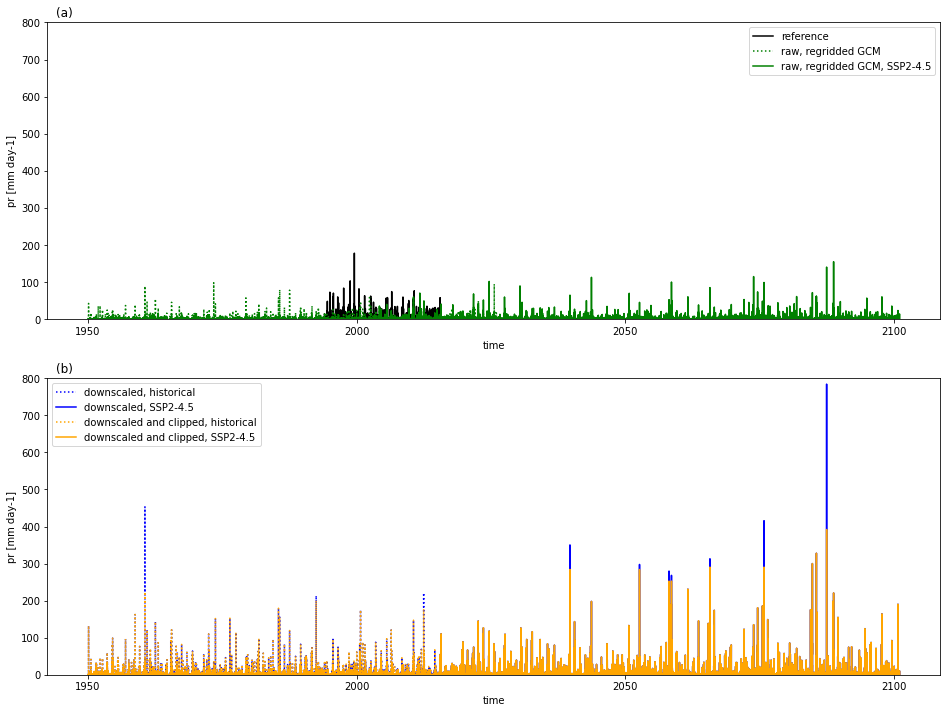

In [16]:
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Delhi 
lat = 28.6517178
lon = 77.2219388

# reference and GCM data 
ref['pr'].sel(lat=lat, lon=lon, method='nearest').plot(color='black', label='reference', ax=axes[0])
gcm_hist['pr'].sel(lat=lat, lon=lon, method='nearest').plot(color='green', linestyle=':', label='raw, regridded GCM', ax=axes[0])
gcm_future['pr'].sel(lat=lat, lon=lon, method='nearest').plot(color='green', label='raw, regridded GCM, SSP2-4.5', ax=axes[0])


ds_hist['pr'].sel(lat=lat, lon=lon, method='nearest').plot(color='blue', label='downscaled, historical',linestyle=':', ax=axes[1])

ds_ssp245['pr'].sel(lat=lat, lon=lon, method='nearest').plot(color='blue', label='downscaled, SSP2-4.5', ax=axes[1])
ds_del_hist['pr'].sel(lat=lat, lon=lon, method='nearest').plot(color='orange', label='downscaled and clipped, historical',linestyle=':', ax=axes[1])
ds_del_ssp245['pr'].sel(lat=lat, lon=lon, method='nearest').plot(color='orange', label='downscaled and clipped, SSP2-4.5', ax=axes[1])

# bc_hist['pr'].sel(lat=lat, lon=lon).plot(label='bias corrected')
axes[0].set_ylim([0, 800])
axes[1].set_ylim([0, 800])
axes[0].legend()
axes[1].legend()
axes[0].set_title('')
axes[1].set_title('')
axes[0].text(0.01, 1.02, "(a)",
transform=axes[0].transAxes,
size=12)
axes[1].text(0.01, 1.02, "(b)",
transform=axes[1].transAxes,
size=12)

plt.savefig(os.path.join('/home/jovyan', 'delhi_clipping.png'), 
            bbox_inches='tight', dpi=300)

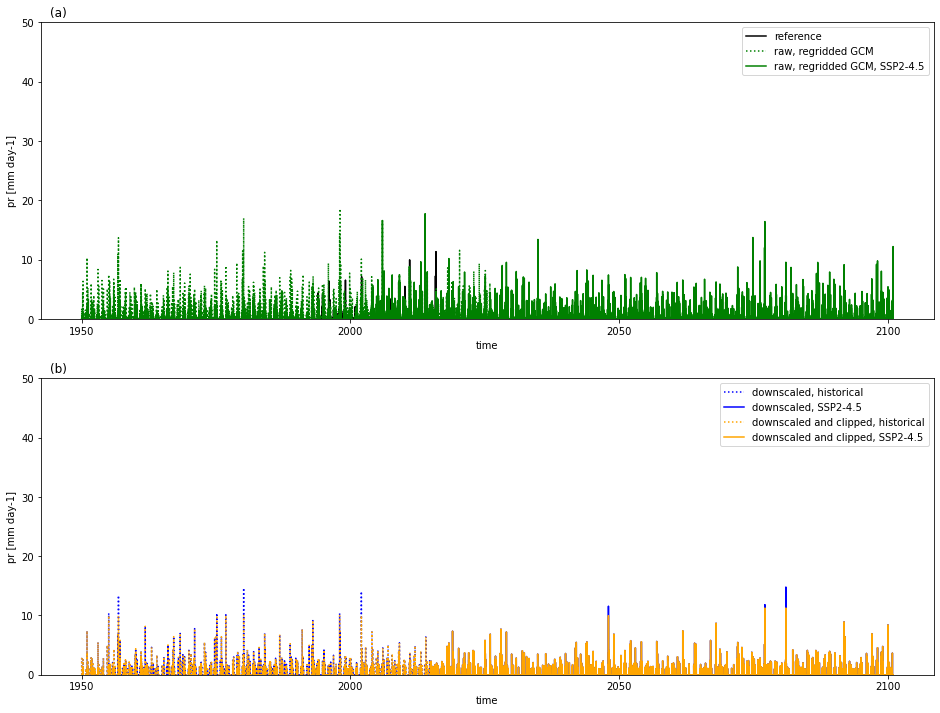

In [17]:
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Cairo
lat = 30.0443879
lon = 31.2357257

# reference and GCM data 
ref['pr'].sel(lat=lat, lon=lon, method='nearest').plot(color='black', label='reference', ax=axes[0])
gcm_hist['pr'].sel(lat=lat, lon=lon, method='nearest').plot(color='green', linestyle=':', label='raw, regridded GCM', ax=axes[0])
gcm_future['pr'].sel(lat=lat, lon=lon, method='nearest').plot(color='green', label='raw, regridded GCM, SSP2-4.5', ax=axes[0])


ds_hist['pr'].sel(lat=lat, lon=lon, method='nearest').plot(color='blue', label='downscaled, historical',linestyle=':', ax=axes[1])

ds_ssp245['pr'].sel(lat=lat, lon=lon, method='nearest').plot(color='blue', label='downscaled, SSP2-4.5', ax=axes[1])
ds_del_hist['pr'].sel(lat=lat, lon=lon, method='nearest').plot(color='orange', label='downscaled and clipped, historical',linestyle=':', ax=axes[1])
ds_del_ssp245['pr'].sel(lat=lat, lon=lon, method='nearest').plot(color='orange', label='downscaled and clipped, SSP2-4.5', ax=axes[1])

# bc_hist['pr'].sel(lat=lat, lon=lon).plot(label='bias corrected')
axes[0].set_ylim([0, 50])
axes[1].set_ylim([0, 50])
axes[0].legend()
axes[1].legend()
axes[0].set_title('')
axes[1].set_title('')
axes[0].text(0.01, 1.02, "(a)",
transform=axes[0].transAxes,
size=12)
axes[1].text(0.01, 1.02, "(b)",
transform=axes[1].transAxes,
size=12)

plt.savefig(os.path.join('/home/jovyan', 'cairo_clipping.png'), 
            bbox_inches='tight', dpi=300)

summary figure of all gridcells 

In [ ]:
time_start = '2080'
time_end = '2100'
corrs = ((ds_del_ssp245.sel(time=slice(time_start, time_end))['pr'] - ds_ssp245.sel(time=slice(time_start, time_end))['pr']) != 0).sum('time')


In [ ]:
corrs_eager = corrs.persist()

In [ ]:
corrs_eager.max().values

In [ ]:
corrs_eager.where(corrs_eager==corrs_eager.max(), drop=True)

In [ ]:
corrs_eager.where(corrs_eager != 0).plot(robust=True)

In [ ]:
corrs_eager.where(corrs_eager != 0).plot(vmin=1, vmax=50)

create workflow to write number of timesteps clipped globally for SSP2-4.5 and SSP3-7.0 for precipitation for all models and for 2080-2100. 

need downscaled data from `stage` and delivered downscaled data to do this. 

In [14]:
# load data paths
with open('/home/jovyan/downscaleCMIP6/notebooks/downscaling_pipeline/post_processing_and_delivery/data_paths.yaml', 'r') as f:
    fps = yaml.load(f, yaml.Loader)

In [16]:
# fps['EC-Earth3-pr']

In [17]:
old_ds_bucket

'downscaled-288ec5ac'

In [18]:
import sys
sys.path.insert(1, '/home/jovyan/downscaleCMIP6/notebooks/downscaling_pipeline/post_processing_and_delivery/')
import dc6_functions

models = dc6_functions.get_cmip6_models()
institutions = dc6_functions.get_cmip6_institutions()
ensemble_members = dc6_functions.get_cmip6_ensemble_members()
# rename variable attributes
long_names = {'tasmax': 'Monthly mean of Daily Maximum Near-Surface Air Temperature', 'tasmin': 'Monthly mean of Daily Minimum Near-Surface Air Temperature', 'pr': 'Monthly sum of Daily Total Precipitation', 'tavg': 'Monthly mean of Daily Average Near-Surface Air Temperature'}

In [19]:
def calculate_and_save_number_clipped_timesteps(model, models_dict, variable, bucket_mapping_oregon_trail, old_ds_bucket, 
                                               ):

    # loop over scenarios
    for scenario in models_dict[model]:
        if scenario == 'historical': 
            time_start = '1960'
            time_end = '1980'
        
            fp_ds = fps[f"{model}-{variable}"][scenario]['downscaled']
            fp_ds_delivered = fps[f"{model}-{variable}"][scenario]['downscaled_delivered']
            ds_del = xr.open_zarr(fp_ds_delivered.replace(old_ds_bucket, bucket_mapping_oregon_trail[old_ds_bucket]), consolidated=True)
            ds = xr.open_zarr(fp_ds.replace(old_ds_bucket, bucket_mapping_oregon_trail[old_ds_bucket]), consolidated=True)

            corrs = ((ds_del.sel(time=slice(time_start, time_end))[variable] - ds.sel(time=slice(time_start, time_end))[variable]) != 0).sum('time')
            ds_corrs = corrs.to_dataset(name='num_timesteps_clipped')
            corrs_eager = ds_corrs.persist()

            zarr_path = 'gs://downscaled-48ec31ab/diagnostics/post-processing/{variable}/{model}/{scenario}/{time_start}-{time_end}/post_processed_timestep_count.zarr'.format(variable=variable, model=model, scenario=scenario, time_start=time_start, time_end=time_end)

            corrs_eager.to_zarr(zarr_path, consolidated=True, mode='w')
            print("wrote zarr to {}".format(zarr_path))
        
        else:
            for future_time_period in ['2030', '2090']:
                
                if future_time_period == '2030':
                    time_start = '2020'
                    time_end = '2040'
                elif future_time_period == '2090':
                    time_start = '2080'
                    time_end = '2100'
                else: 
                    raise ValueError('have not yet included this time period in analysis')

                fp_ds = fps[f"{model}-{variable}"][scenario]['downscaled']
                fp_ds_delivered = fps[f"{model}-{variable}"][scenario]['downscaled_delivered']
                ds_del = xr.open_zarr(fp_ds_delivered.replace(old_ds_bucket, bucket_mapping_oregon_trail[old_ds_bucket]), consolidated=True)
                ds = xr.open_zarr(fp_ds.replace(old_ds_bucket, bucket_mapping_oregon_trail[old_ds_bucket]), consolidated=True)

                corrs = ((ds_del.sel(time=slice(time_start, time_end))[variable] - ds.sel(time=slice(time_start, time_end))[variable]) != 0).sum('time')
                ds_corrs = corrs.to_dataset(name='num_timesteps_clipped')
                corrs_eager = ds_corrs.persist()

                zarr_path = 'gs://downscaled-48ec31ab/diagnostics/post-processing/{variable}/{model}/{scenario}/{time_start}-{time_end}/post_processed_timestep_count.zarr'.format(variable=variable, model=model, scenario=scenario, time_start=time_start, time_end=time_end)

                corrs_eager.to_zarr(zarr_path, consolidated=True, mode='w')
                print("wrote zarr to {}".format(zarr_path))

In [ ]:
models

In [20]:
'''wanted_keys = ['FGOALS-g3', 
               'ACCESS-ESM1-5', 'ACCESS-CM2', 
               'INM-CM4-8', 'INM-CM5-0'] # The keys you want'''
wanted_keys = ['EC-Earth3'] # The keys you want
models_subset = dict((k, models[k]) for k in wanted_keys if k in models)

In [22]:
# models_subset
models_subset = {'EC-Earth3': ['ssp585']}
models_subset

{'EC-Earth3': ['ssp585']}

In [23]:
# variables = ['tasmax', 'pr']
variables = ['pr']
for model in tqdm(models_subset):
    for variable in variables:
        print(model)
        print(variable)
        calculate_and_save_number_clipped_timesteps(model, models, variable, bucket_mapping_oregon_trail, old_ds_bucket)

  0%|          | 0/1 [00:00<?, ?it/s]

EC-Earth3
pr
wrote zarr to gs://downscaled-48ec31ab/diagnostics/post-processing/pr/EC-Earth3/historical/1960-1980/post_processed_timestep_count.zarr
wrote zarr to gs://downscaled-48ec31ab/diagnostics/post-processing/pr/EC-Earth3/ssp126/2020-2040/post_processed_timestep_count.zarr
wrote zarr to gs://downscaled-48ec31ab/diagnostics/post-processing/pr/EC-Earth3/ssp126/2080-2100/post_processed_timestep_count.zarr
wrote zarr to gs://downscaled-48ec31ab/diagnostics/post-processing/pr/EC-Earth3/ssp245/2020-2040/post_processed_timestep_count.zarr
wrote zarr to gs://downscaled-48ec31ab/diagnostics/post-processing/pr/EC-Earth3/ssp245/2080-2100/post_processed_timestep_count.zarr
wrote zarr to gs://downscaled-48ec31ab/diagnostics/post-processing/pr/EC-Earth3/ssp370/2020-2040/post_processed_timestep_count.zarr
wrote zarr to gs://downscaled-48ec31ab/diagnostics/post-processing/pr/EC-Earth3/ssp370/2080-2100/post_processed_timestep_count.zarr
wrote zarr to gs://downscaled-48ec31ab/diagnostics/post-pro